## Import nedded models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis and Wrangling

## Read data

In [2]:
train_df = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/train.csv')
test_df = pd.read_csv('/kaggle/input/bank-term-deposit-predictions/test.csv')

## Get sample

In [3]:
# Train Data Sample
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
32138,36,management,married,secondary,no,1160,yes,no,cellular,15,apr,56,1,323,3,failure,no
44084,50,technician,married,tertiary,no,0,no,yes,cellular,6,jul,257,1,85,7,failure,no
13662,47,services,married,secondary,no,0,yes,no,cellular,9,jul,173,1,-1,0,unknown,no
22886,30,management,single,tertiary,no,0,no,no,cellular,25,aug,144,18,-1,0,unknown,no
22997,43,management,divorced,tertiary,no,-166,yes,yes,cellular,26,aug,176,2,-1,0,unknown,no
89,57,retired,married,secondary,no,486,yes,no,unknown,5,may,180,2,-1,0,unknown,no
6442,38,blue-collar,single,secondary,no,5891,yes,no,unknown,27,may,160,3,-1,0,unknown,no
16890,29,services,married,tertiary,no,-62,yes,yes,cellular,25,jul,126,1,-1,0,unknown,no
29927,45,blue-collar,married,secondary,no,1778,yes,no,cellular,4,feb,41,1,251,5,failure,no
31314,59,unemployed,married,secondary,no,0,no,no,cellular,11,mar,74,1,-1,0,unknown,no


In [4]:
test_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3120,47,technician,married,primary,no,187,yes,no,unknown,9,may,165,1,-1,0,unknown,no
98,36,blue-collar,divorced,secondary,no,2843,no,no,cellular,12,feb,473,1,182,1,success,no
2225,31,self-employed,single,tertiary,no,96,no,no,cellular,5,feb,577,1,-1,0,unknown,no
2388,35,admin.,married,secondary,no,0,yes,no,cellular,7,may,121,2,-1,0,unknown,no
780,33,blue-collar,married,secondary,no,1134,yes,no,unknown,23,may,304,2,-1,0,unknown,no
3360,79,retired,married,primary,no,429,no,no,telephone,8,jul,1006,2,-1,0,unknown,yes
2719,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,yes
4002,58,technician,divorced,secondary,no,-123,no,no,cellular,5,aug,131,2,-1,0,unknown,no
73,41,services,married,tertiary,no,412,yes,no,unknown,3,jun,154,5,-1,0,unknown,no
3752,47,services,married,secondary,no,0,yes,no,telephone,9,jul,250,1,-1,0,unknown,no


## Get data informaion

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Age Feature
The age of the customer.

In [6]:
# Get statistical analysis
train_df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

/tmp/ipykernel_19/2994252962.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(train_df['age'], bins=50, kde=True, palette='viridis')


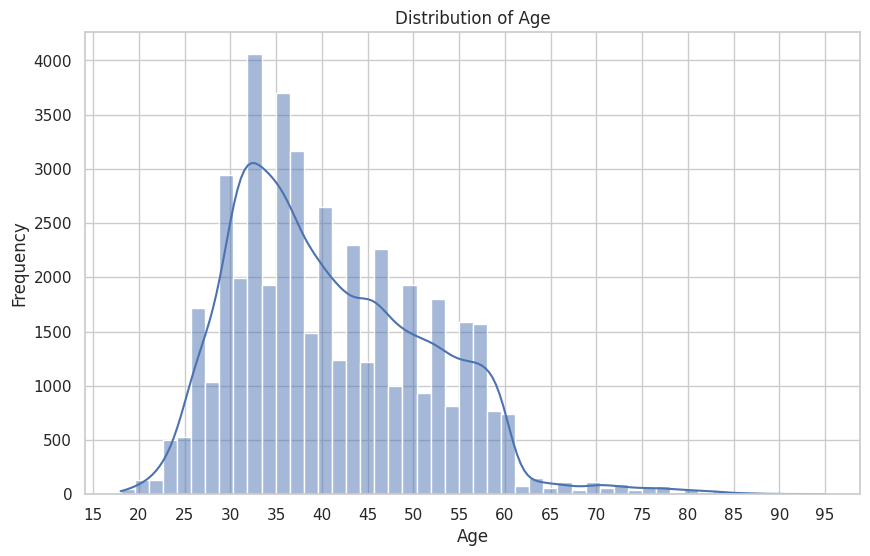

In [7]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
ax = sns.histplot(train_df['age'], bins=50, kde=True, palette='viridis')

# Add labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15, 100, 5)])


# Show the plot
plt.show()

## Job Feature
The occupation/employment status of the customer.

In [8]:
train_df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

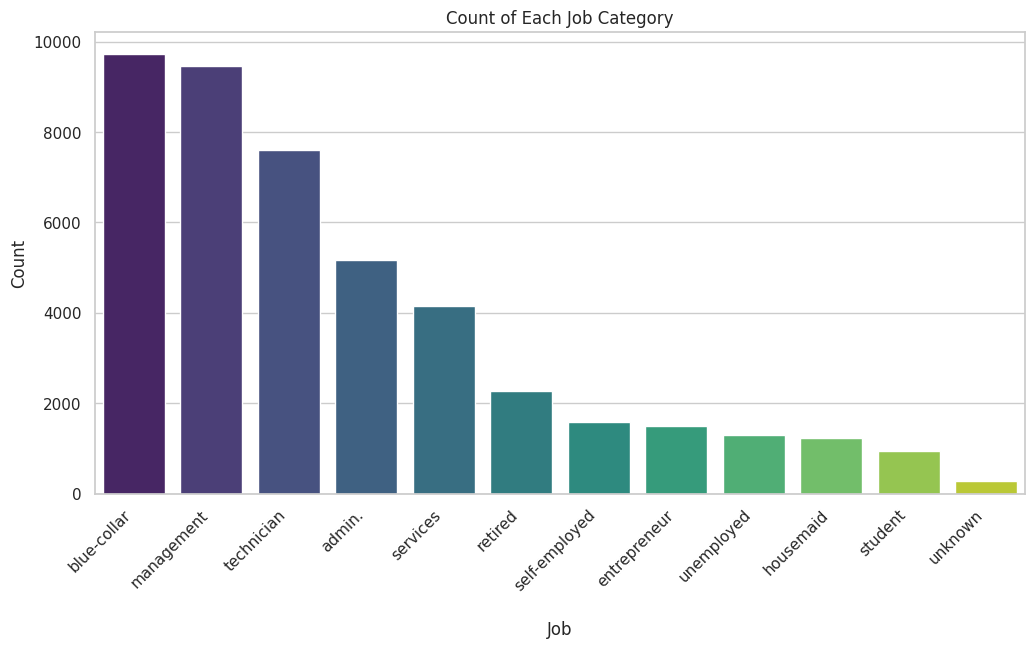

In [9]:
# Define counts
job_counts = train_df['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

change valu 'un known' 

In [10]:
test_df['job'] = test_df['job'].replace('unknown', 'others')
test_df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
others            38
Name: count, dtype: int64

## Marital-Status Feature
The marital status of the customer.

In [11]:
train_df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

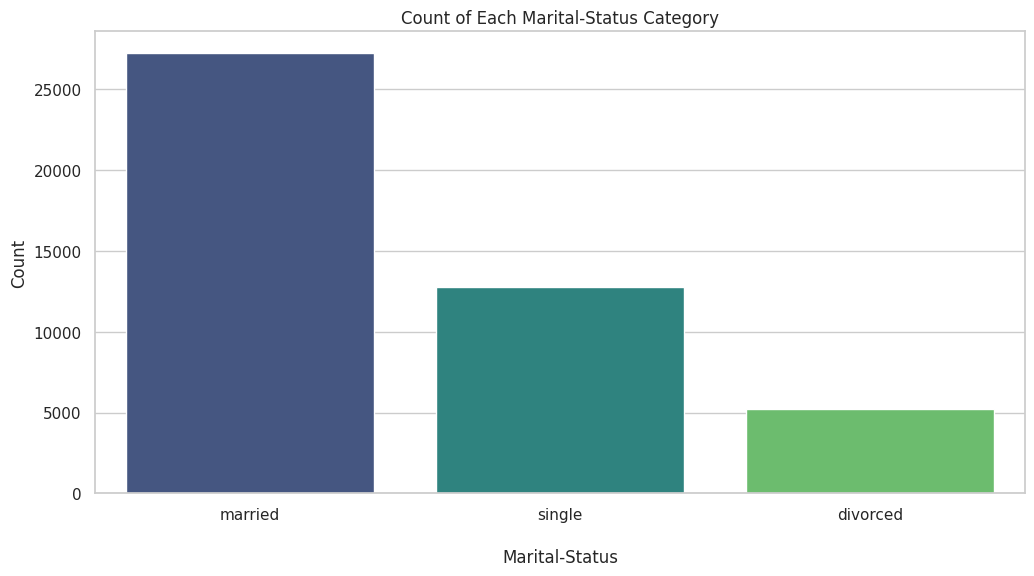

In [12]:
# Define counts
marital_counts = train_df['marital'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Marital-Status Category')
plt.xlabel('\nMarital-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

## Educational Feature
The education level attained by the customer.

In [13]:
train_df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

**change value "unknown"**

In [14]:
train_df['education'] = train_df['education'].replace('unknown', 'others')
train_df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
others        1857
Name: count, dtype: int64

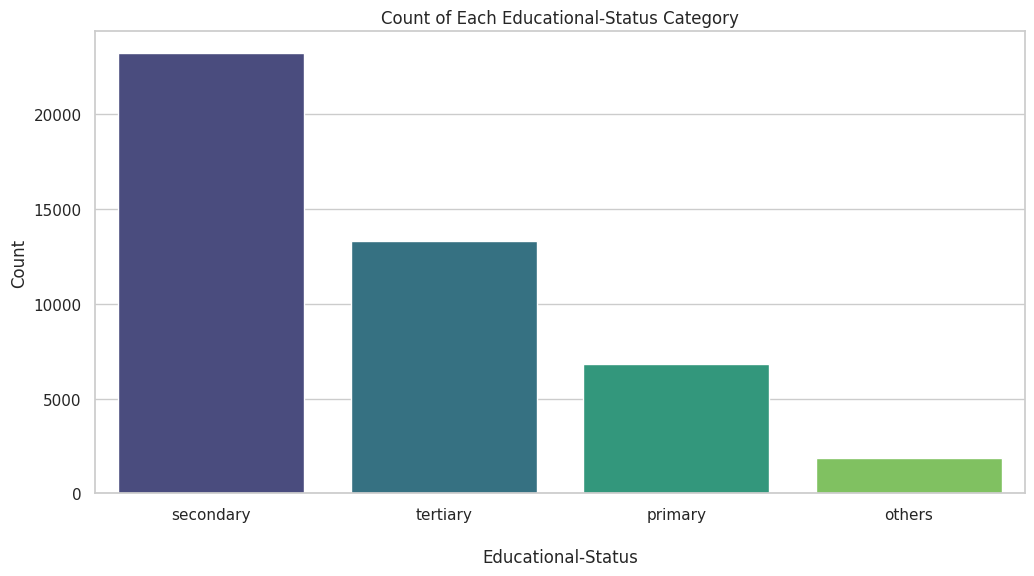

In [15]:
# Define Counts
education_counts = train_df['education'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Educational-Status Category')
plt.xlabel('\nEducational-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

## Credit in Default Feature
Whether the customer has credit in default or not

In [16]:
train_df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

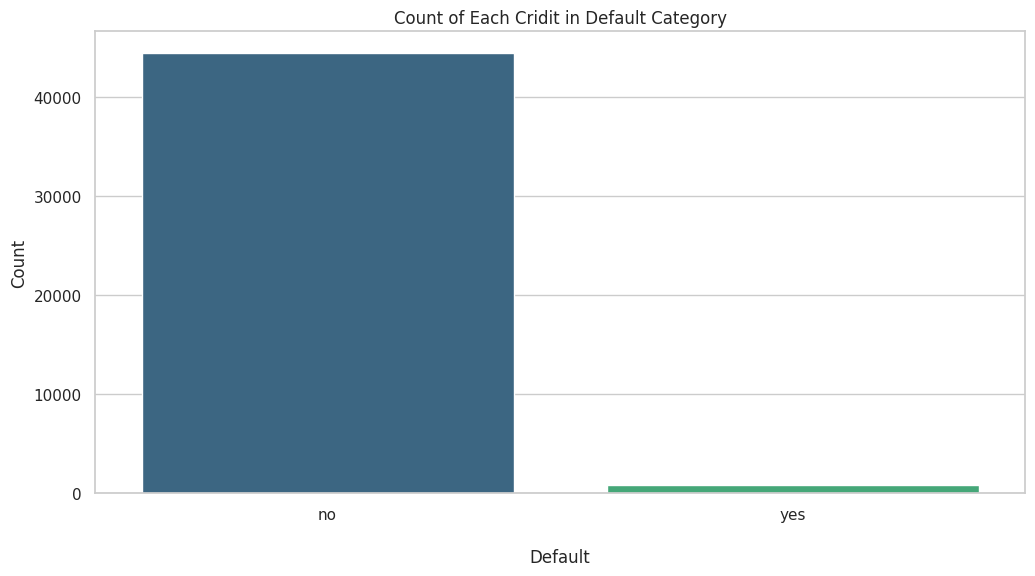

In [17]:
# Define counts
default_counts = train_df['default'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=default_counts.index, y=default_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Cridit in Default Category')
plt.xlabel('\nDefault')
plt.ylabel('Count')

# Show the plot
plt.show()

## feature is worthless, the "no" values is so poor, so I'll drop it

In [18]:
train_df.drop(columns=['default'], inplace=True)


In [19]:
test_df.drop(columns=['default'], inplace=True)


## Balance Feature
The balance in the customer's account.

In [20]:
#train_df['balance'].value_counts()
train_df['balance'].describe()


count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

/tmp/ipykernel_19/1190658190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df['balance'], palette='viridis')


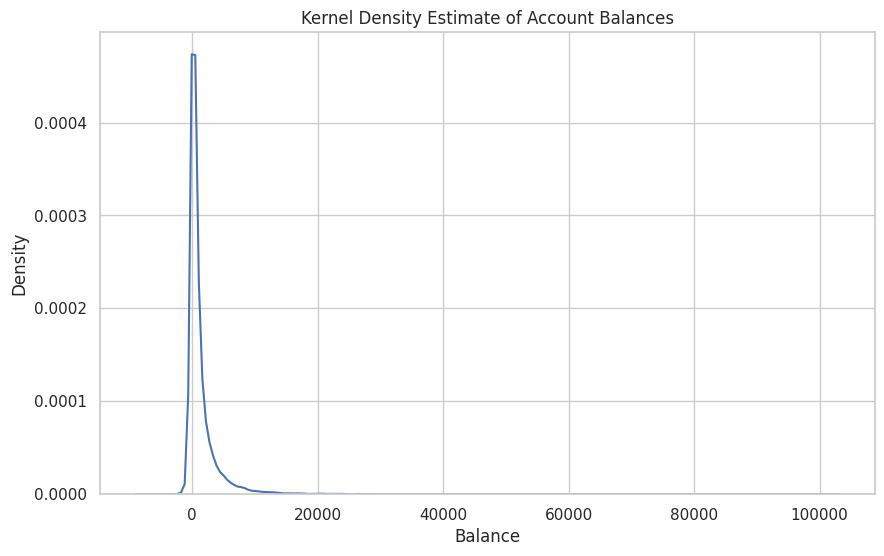

In [21]:
# Define figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.kdeplot(train_df['balance'], palette='viridis')

# Add labels and title
plt.title('Kernel Density Estimate of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Density')

# Show the plot
plt.show()

**Check for values under zero**

In [22]:
train_df[train_df['balance'] <= 0]['balance'].count()


7280